<a href="https://colab.research.google.com/github/sylvioneto/python_datascience_movies/blob/master/tmdb_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# environment setup
!pip install seaborn==0.9.0
import seaborn as sns
print(sns.__version__)
import pandas as pd

In [0]:
# read the file and show first 5 records
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

In [0]:
# unique movie languages
tmdb.original_language.unique()

# how many movies in each language
print("show as serie")
tmdb["original_language"].value_counts()

In [0]:
# tranform serie to data frame
df_lang_count = tmdb["original_language"].value_counts().to_frame().reset_index()
df_lang_count.columns = ["language", "total"]
df_lang_count

In [0]:
# Plot categories using barplot
import seaborn as sns

sns.barplot(x = "language", y = "total", data = df_lang_count)

In [0]:
# Plot categories using catplot
sns.catplot(x = "original_language", kind="count", data = tmdb)

In [0]:
# plot in a pie chat
import matplotlib.pyplot as plt
plt.pie(df_lang_count["total"], labels = df_lang_count["language"])

In [0]:
# grouping minor amounts

# count and sum total movies
total = tmdb["original_language"].value_counts().sum()

# count and get only english
total_english = tmdb["original_language"].value_counts().loc["en"]

# print values
print("Total movies in English is {} and Others is {}".format(total_english, total - total_english))

# create a dictionary to store the values
total_data_dic = {
    'language' : ['english', 'others'],
    'total' : [total_english,  total - total_english]
}
total_data_frame = pd.DataFrame(total_data_dic)

# plot in a bar chart
sns.barplot(data = total_data_frame, x = total_data_frame["language"], y = total_data_frame["total"])

In [0]:
# plot in a pie chart
plt.pie(total_data_frame["total"], labels = total_data_frame["language"])

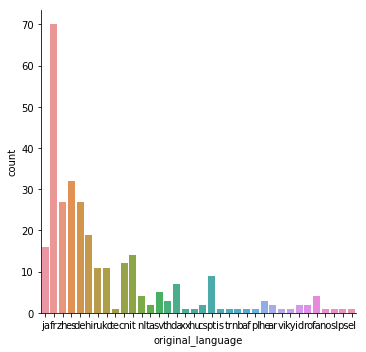

In [0]:
# query non english movies
non_english_movies = tmdb.query("original_language != 'en'")
sns.catplot(x = "original_language", kind="count", data = non_english_movies)

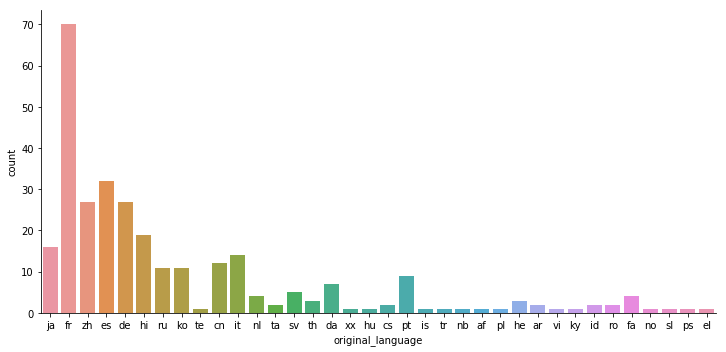

In [0]:
# change aspect to make it less square
sns.catplot(x = "original_language", kind="count",
            data = non_english_movies,
            aspect = 2)

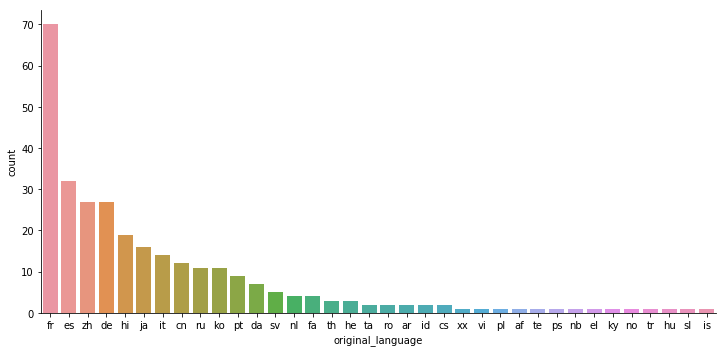

In [0]:
# order higher to lower
non_english_ordered = non_english_movies.original_language.value_counts()

sns.catplot(x = "original_language", kind="count",
            data = non_english_movies,
            aspect = 2,
            order = non_english_count.index)

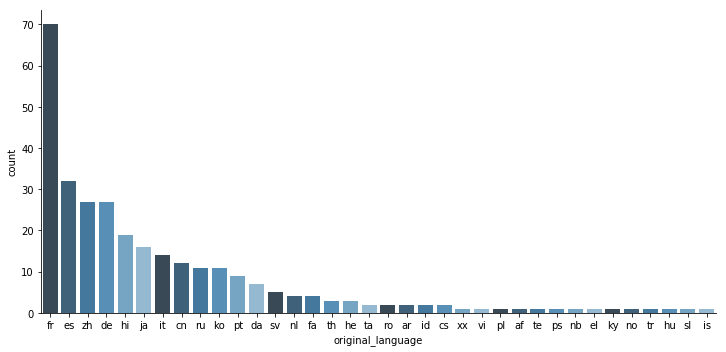

In [0]:
# using a palette of colours
sns.catplot(x = "original_language", kind="count",
            data = non_english_movies,
            aspect = 2,
            palette=sns.color_palette("Blues_d"),
            order = non_english_count.index)